## Over-sampling Method Comparison

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)

We will determine if the different over-sampling algorithms discussed in this section improve the performance of Random Forests on different datasets with imbalanced classes.

In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

from imblearn.datasets import fetch_datasets

from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)

In [2]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),

    'smote': SMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        n_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'border2': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),
}

In [3]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [4]:
# print class imbalance

for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})



In [5]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=100, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

In [6]:
# to save the results
results_dict = {}
shapes_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # as some oversampling techniques use KNN
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
        
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    
    # store results
    results_dict[dataset]['full_data'] = roc
    shapes_dict[dataset]['full_data'] = len(X_train)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        # evaluate performance
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        
        #store results
        results_dict[dataset][oversampler] = roc
        shapes_dict[dataset][oversampler] = len(X_resampled)
        print()
        
    print()
        

car_eval_34
Train set
Random Forests roc-auc: 0.9581261802905924
Test set
Random Forests roc-auc: 0.9440504133074803

random
Train set
Random Forests roc-auc: 0.9867662928276872
Test set
Random Forests roc-auc: 0.9847688539646903

smote


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9892067644300562
Test set
Random Forests roc-auc: 0.982268598836616

adasyn


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.990394134540928
Test set
Random Forests roc-auc: 0.9860955199510154

border1


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9903360696805026
Test set
Random Forests roc-auc: 0.98706500663333

border2


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9897836615665268
Test set
Random Forests roc-auc: 0.9876773140116338

svm


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9872773506249919
Test set
Random Forests roc-auc: 0.9782886008776406


ecoli
Train set
Random Forests roc-auc: 0.9716599190283401
Test set
Random Forests roc-auc: 0.9408212560386474

random
Train set
Random Forests roc-auc: 0.9687507154140244
Test set
Random Forests roc-auc: 0.961352657004831

smote


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9773356837068748
Test set
Random Forests roc-auc: 0.9601449275362319

adasyn


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9715029552490853
Test set
Random Forests roc-auc: 0.967391304347826

border1


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9769121586044276
Test set
Random Forests roc-auc: 0.9806763285024154

border2


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9707424280579657
Test set
Random Forests roc-auc: 0.9873188405797101

svm


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9779080149263981
Test set
Random Forests roc-auc: 0.9613526570048309


thyroid_sick
Train set
Random Forests roc-auc: 0.9646448684059303
Test set
Random Forests roc-auc: 0.9521203914568843

random
Train set
Random Forests roc-auc: 0.9625854099125659
Test set
Random Forests roc-auc: 0.9562565396688618

smote


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9605968807461769
Test set
Random Forests roc-auc: 0.9487843909644857

adasyn


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9582371083546223
Test set
Random Forests roc-auc: 0.9547424139841201

border1


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9617160200097215
Test set
Random Forests roc-auc: 0.9432572167169323

border2


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9547950420989884
Test set
Random Forests roc-auc: 0.9403520649966147

svm


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9694301766481193
Test set
Random Forests roc-auc: 0.9401797254877824


arrhythmia
Train set
Random Forests roc-auc: 0.9931143025772182
Test set
Random Forests roc-auc: 0.8515625

random
Train set
Random Forests roc-auc: 0.9989821142940236
Test set
Random Forests roc-auc: 0.8984375

smote


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9987919598214785
Test set
Random Forests roc-auc: 0.908203125

adasyn


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9996085054977014
Test set
Random Forests roc-auc: 0.93359375

border1


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9985123208912652
Test set
Random Forests roc-auc: 0.796875

border2


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9976398474289997
Test set
Random Forests roc-auc: 0.849609375

svm


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9983006417789027
Test set
Random Forests roc-auc: 0.8955078125


ozone_level
Train set
Random Forests roc-auc: 0.9333229162016161
Test set
Random Forests roc-auc: 0.8202702702702702

random
Train set
Random Forests roc-auc: 0.9478515890133454
Test set
Random Forests roc-auc: 0.8238416988416988

smote


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9554774113770573
Test set
Random Forests roc-auc: 0.8274774774774776

adasyn


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9493674427893772
Test set
Random Forests roc-auc: 0.8293436293436293

border1


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9830520064310351
Test set
Random Forests roc-auc: 0.8708494208494209

border2


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9811858879675444
Test set
Random Forests roc-auc: 0.8688223938223938

svm


C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\imblearn\over_sampling\_smote\filter.py:437: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9823188644029144
Test set
Random Forests roc-auc: 0.8615186615186615




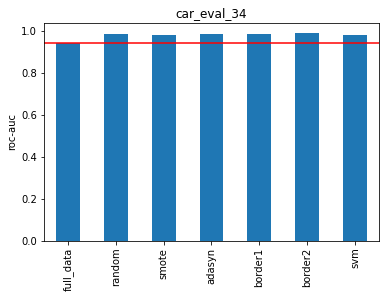

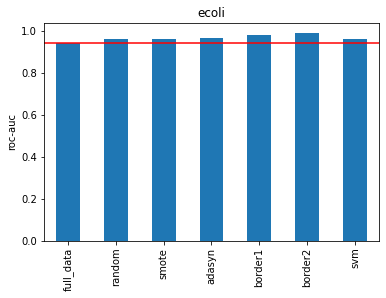

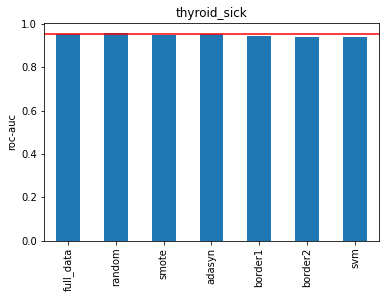

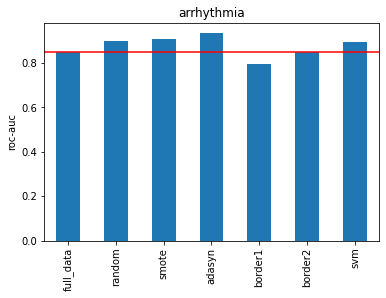

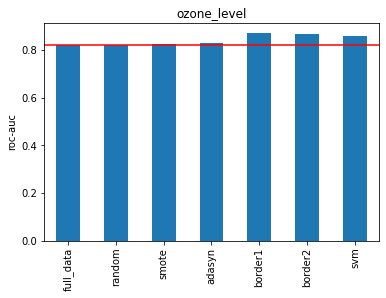

In [7]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
#     plt.ylim(0.55, 0.9)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

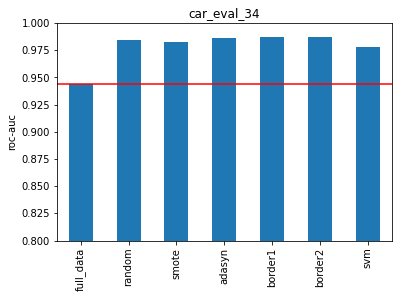

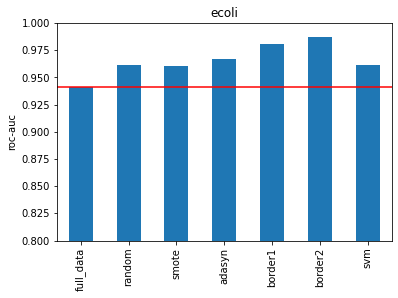

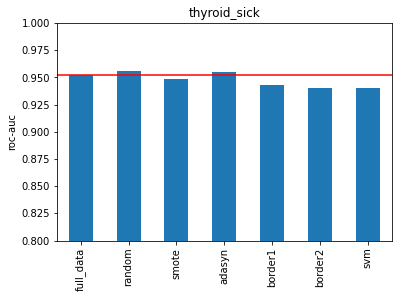

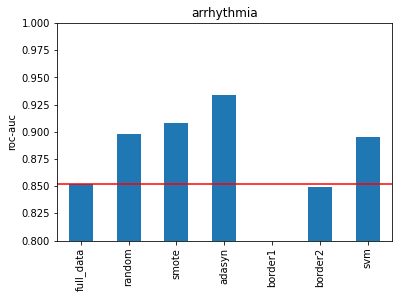

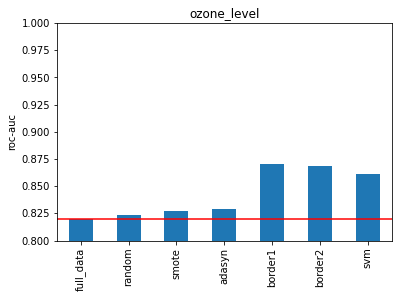

In [8]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

**Different over-sampling techniques work better in different datasets.**

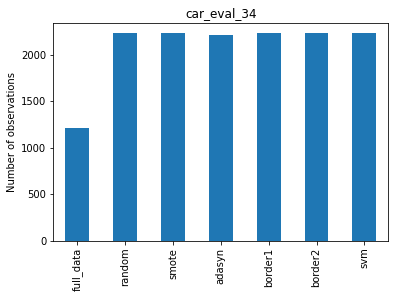

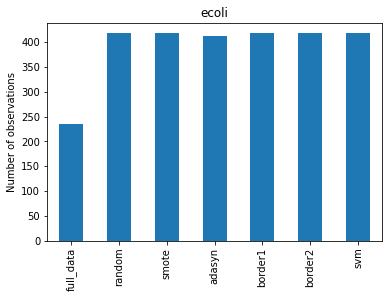

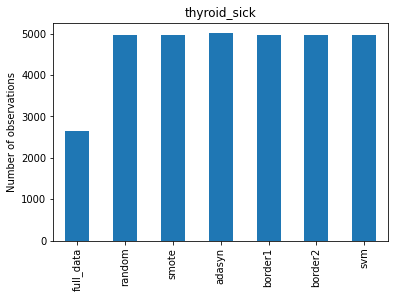

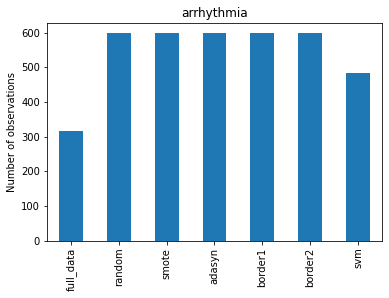

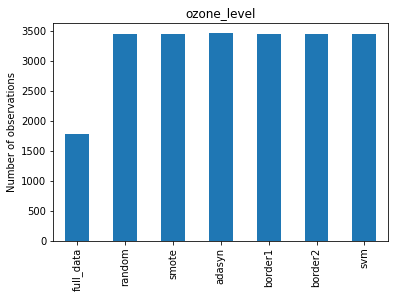

In [9]:
for dataset in datasets_ls:
    
    pd.Series(shapes_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('Number of observations')
    plt.show()